## Implement Frequency Domain of a Signal
---

In [2]:
# Importing libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import control as ctr
import sys 

# Since we require a discrete frequency, we need to convert our continuous data to discrete using the following function
from control.matlab import c2d

# Starting to write outputs from cells to a log file
stdoutOrigin = sys.stdout 
sys.stdout = open("log.txt", "w")

In [3]:
# Generating a random numerator
numerator = random.randint(0, 10)

# Generating three random numbers to be the polynomials coefficients
coefficients = []
for i in range(3):
    coefficients.append(
        random.random()
    )

# Creating a transfer function
g = ctr.TransferFunction(
    numerator,
    coefficients
)

In [4]:
# coefficients = [0.7969569163794469, 0.08970023934623406, 0.5930328075294755]
# coefficients = [0.5368, 0.0141, 0.4288]

coefficients = [0.283963545222893, 0.10585003054024467, 0.4768044898369217]
numerator = 1

# Creating the transfer function (tf)
g = ctr.TransferFunction(
    numerator,
    coefficients
)

# Getting a closer look at the transfer function
print('Printing the transfer function generated:')
print(g)
g

TransferFunction(array([1]), array([0.28396355, 0.10585003, 0.47680449]))

In [5]:
list(coefficients)

[0.283963545222893, 0.10585003054024467, 0.4768044898369217]

### Plotting the time domain

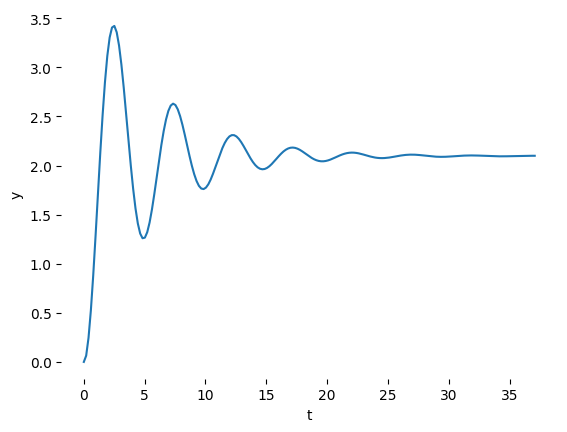

In [6]:
# Creating a step response using the control function
t, y = ctr.step_response(g)

# Removing the box around the graph
plt.box(False)

# Labelling axes
plt.xlabel('t')
plt.ylabel('y')

# Plotting the variables t and y
plt.plot(t, y)

In [7]:
# Closer look at t and y
print('Shapes of x and y axes')
print('t:', np.shape(t), '| y:', np.shape(y))
print('\nPrinting t:', t, '\nPrinting y:', y, sep='\n')

### Plotting the frequency domain

In [8]:
# Converted the continuous transfer function to a discrete one
Dg = c2d(g, 0.5)

# Printing the new discrete tf
print('\nPrinting the discrete transfer function generated:', Dg)
Dg

TransferFunction(array([0.39997283, 0.37555471]), array([ 1.        , -1.46018346,  0.82995847]), 0.5)

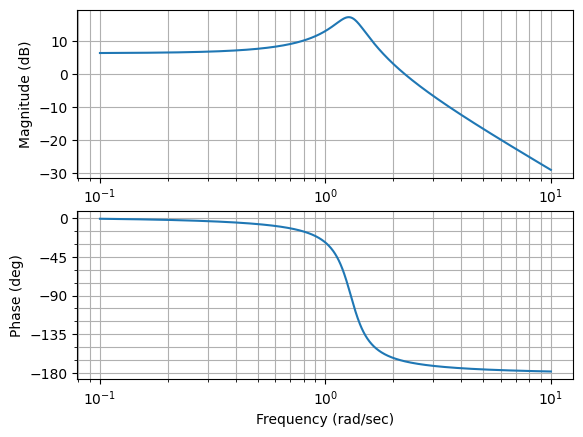

In [9]:
# Bode graph for the continuous tf
mag, phase, omega = ctr.bode(g)

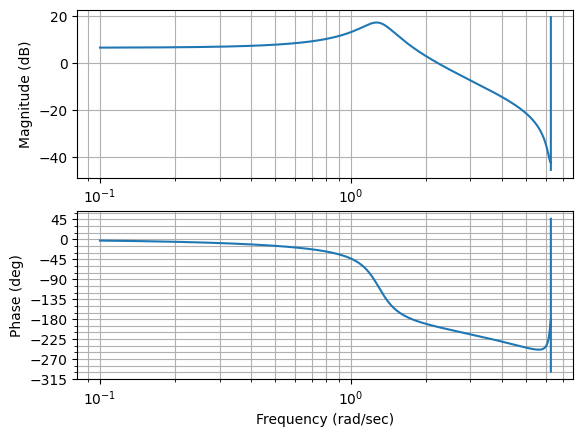

In [10]:
# Bode graph for the discrete tf
mag, phase, omega = ctr.bode(Dg)

In [11]:
# Stop writing output to log file
sys.stdout.close()
sys.stdout = stdoutOrigin